In [1]:
from flasher_lib import *

In [2]:
#definir variables
m=4
delta=np.pi/8
alpha=np.pi/2-np.pi/m
epsilon=3*np.pi/180
eta=(np.pi/m)-(epsilon/2)
height = 4


In [3]:
def encontrar_indice(modulos, distancia_k):
    suma_modulos = 0
    for idx, modulo in enumerate(modulos):
        suma_modulos += modulo
        if distancia_k < suma_modulos:
            return idx
    return -1  # Si no encuentra un índice adecuado

In [4]:
def calcular_modulos(parametros):
    i,j,m,delta,alpha,epsilon=parametros
    modulos=[]
    for indice in range(i):
        distancias= e_distance(p(indice,j,m,delta,alpha,epsilon), p(indice+1,j,m,delta,alpha,epsilon))
        #print(distancias)
        modulos.append(distancias)
    return modulos

In [5]:
def r_i_j(params):
    i,j,m, i_final, delta,alpha,epsilon,altura=params
    modulos_totales = []
    resultados = []
    distancia_k =dk(altura,epsilon,m)
    punto_inicial=p(0,j,m, delta,alpha,epsilon)
    punto_actual=punto_inicial 
    for indice in range(i_final): #CONFIRMAR SI ES HASTA i O i-1
        #print("indicEEe", indice)
        p1= p(indice,j,m,delta,alpha,epsilon)
        #print("p1", p1)
        p2= p(indice+1,j,m,delta,alpha,epsilon)
        #print("p2", p2)
        distancia= e_distance(p1,p2)
        modulos_totales.append(distancia)
    #print("modulos_totales", modulos_totales)
    total_modulos = sum(modulos_totales)
    #print("total_modulos", total_modulos)
    #print("distancia_k", distancia_k)
    if total_modulos < distancia_k:
        #print("Solo cabe un punto")
        return punto_actual
    else:
        #puntos_totales=np.floor(total_modulos/distancia_k)
        indice=encontrar_indice(modulos_totales, distancia_k*(i))
        #print("distancia k buscada para este indice", distancia_k*(i))  
        #print("i evaluado", i)
        #print("indice encontrado", indice)
        if indice == -1:
            #print("Muchos puntos para tan poco espacio")
            return None
        remanente=distancia_k*(i)-sum(modulos_totales[:indice])
        resultados.append([indice, remanente])
        for idx,remanente in resultados:
            if idx>=i:
                break
        p_start=p(idx,j,m,delta,alpha,epsilon)
        #print("p_start", p_start)
        p_next=p(idx+1,j,m,delta,alpha,epsilon)
        #print("p_next", p_next)
        direccion=(p_next-p_start)/e_distance(p_next,p_start)
        desplazamiento=direccion*remanente
        punto_actual=p_start+desplazamiento
        return punto_actual
        

In [6]:
parametros=(5,0, 5, 15,delta,alpha,epsilon,4)

In [7]:
# parametros1=(0,0, 5, 4,delta,alpha,epsilon,2)
# parametros2=(1,0, 5, 4,delta,alpha,epsilon,2)
#parametros3=(2,0, 5, 4,delta,alpha,epsilon,2)
parametros4=(3,0, 5, 9,delta,alpha,epsilon,2)
#parametros5=(4,0, 5, 4,delta,alpha,epsilon,2)
# punto1=r_i_j(parametros1)
# punto2=r_i_j(parametros2)
#punto3=r_i_j(parametros3)
punto4=r_i_j(parametros4)
#punto5=r_i_j(parametros5)
# print("punto1", punto1)
# print("punto2", punto2)
# print("punto3", punto3)
print("punto4", punto4)
#print("punto5", punto5)

punto4 [-5.00275925  8.6178067 ]


i indice en el for 0
j indice en el for 0
punto_r [1. 0.]
j indice en el for 1
punto_r [0.30901699 0.95105652]
j indice en el for 2
punto_r [-0.80901699  0.58778525]
j indice en el for 3
punto_r [-0.80901699 -0.58778525]
j indice en el for 4
punto_r [ 0.30901699 -0.95105652]
i indice en el for 1
j indice en el for 0
punto_r [-2.57097929  6.05771624]
j indice en el for 1
punto_r [-6.5557068  -0.57320934]
j indice en el for 2
punto_r [-1.48067033 -6.4119791 ]
j indice en el for 3
punto_r [ 5.64060221 -3.38961168]
j indice en el for 4
punto_r [4.96675421 4.31708387]
i indice en el for 2
j indice en el for 0
punto_r [-7.6708071  10.93212349]
j indice en el for 1
punto_r [-12.76747703  -3.91715913]
j indice en el for 2
punto_r [ -0.21992766 -13.35306097]
j indice en el for 3
punto_r [12.63155426 -4.3354864 ]
j indice en el for 4
punto_r [ 8.02665753 10.67358302]
i indice en el for 3
j indice en el for 0
punto_r [-13.47073645  14.96103704]
j indice en el for 1
punto_r [-18.39147825  -8.18821

TypeError: 'NoneType' object is not subscriptable

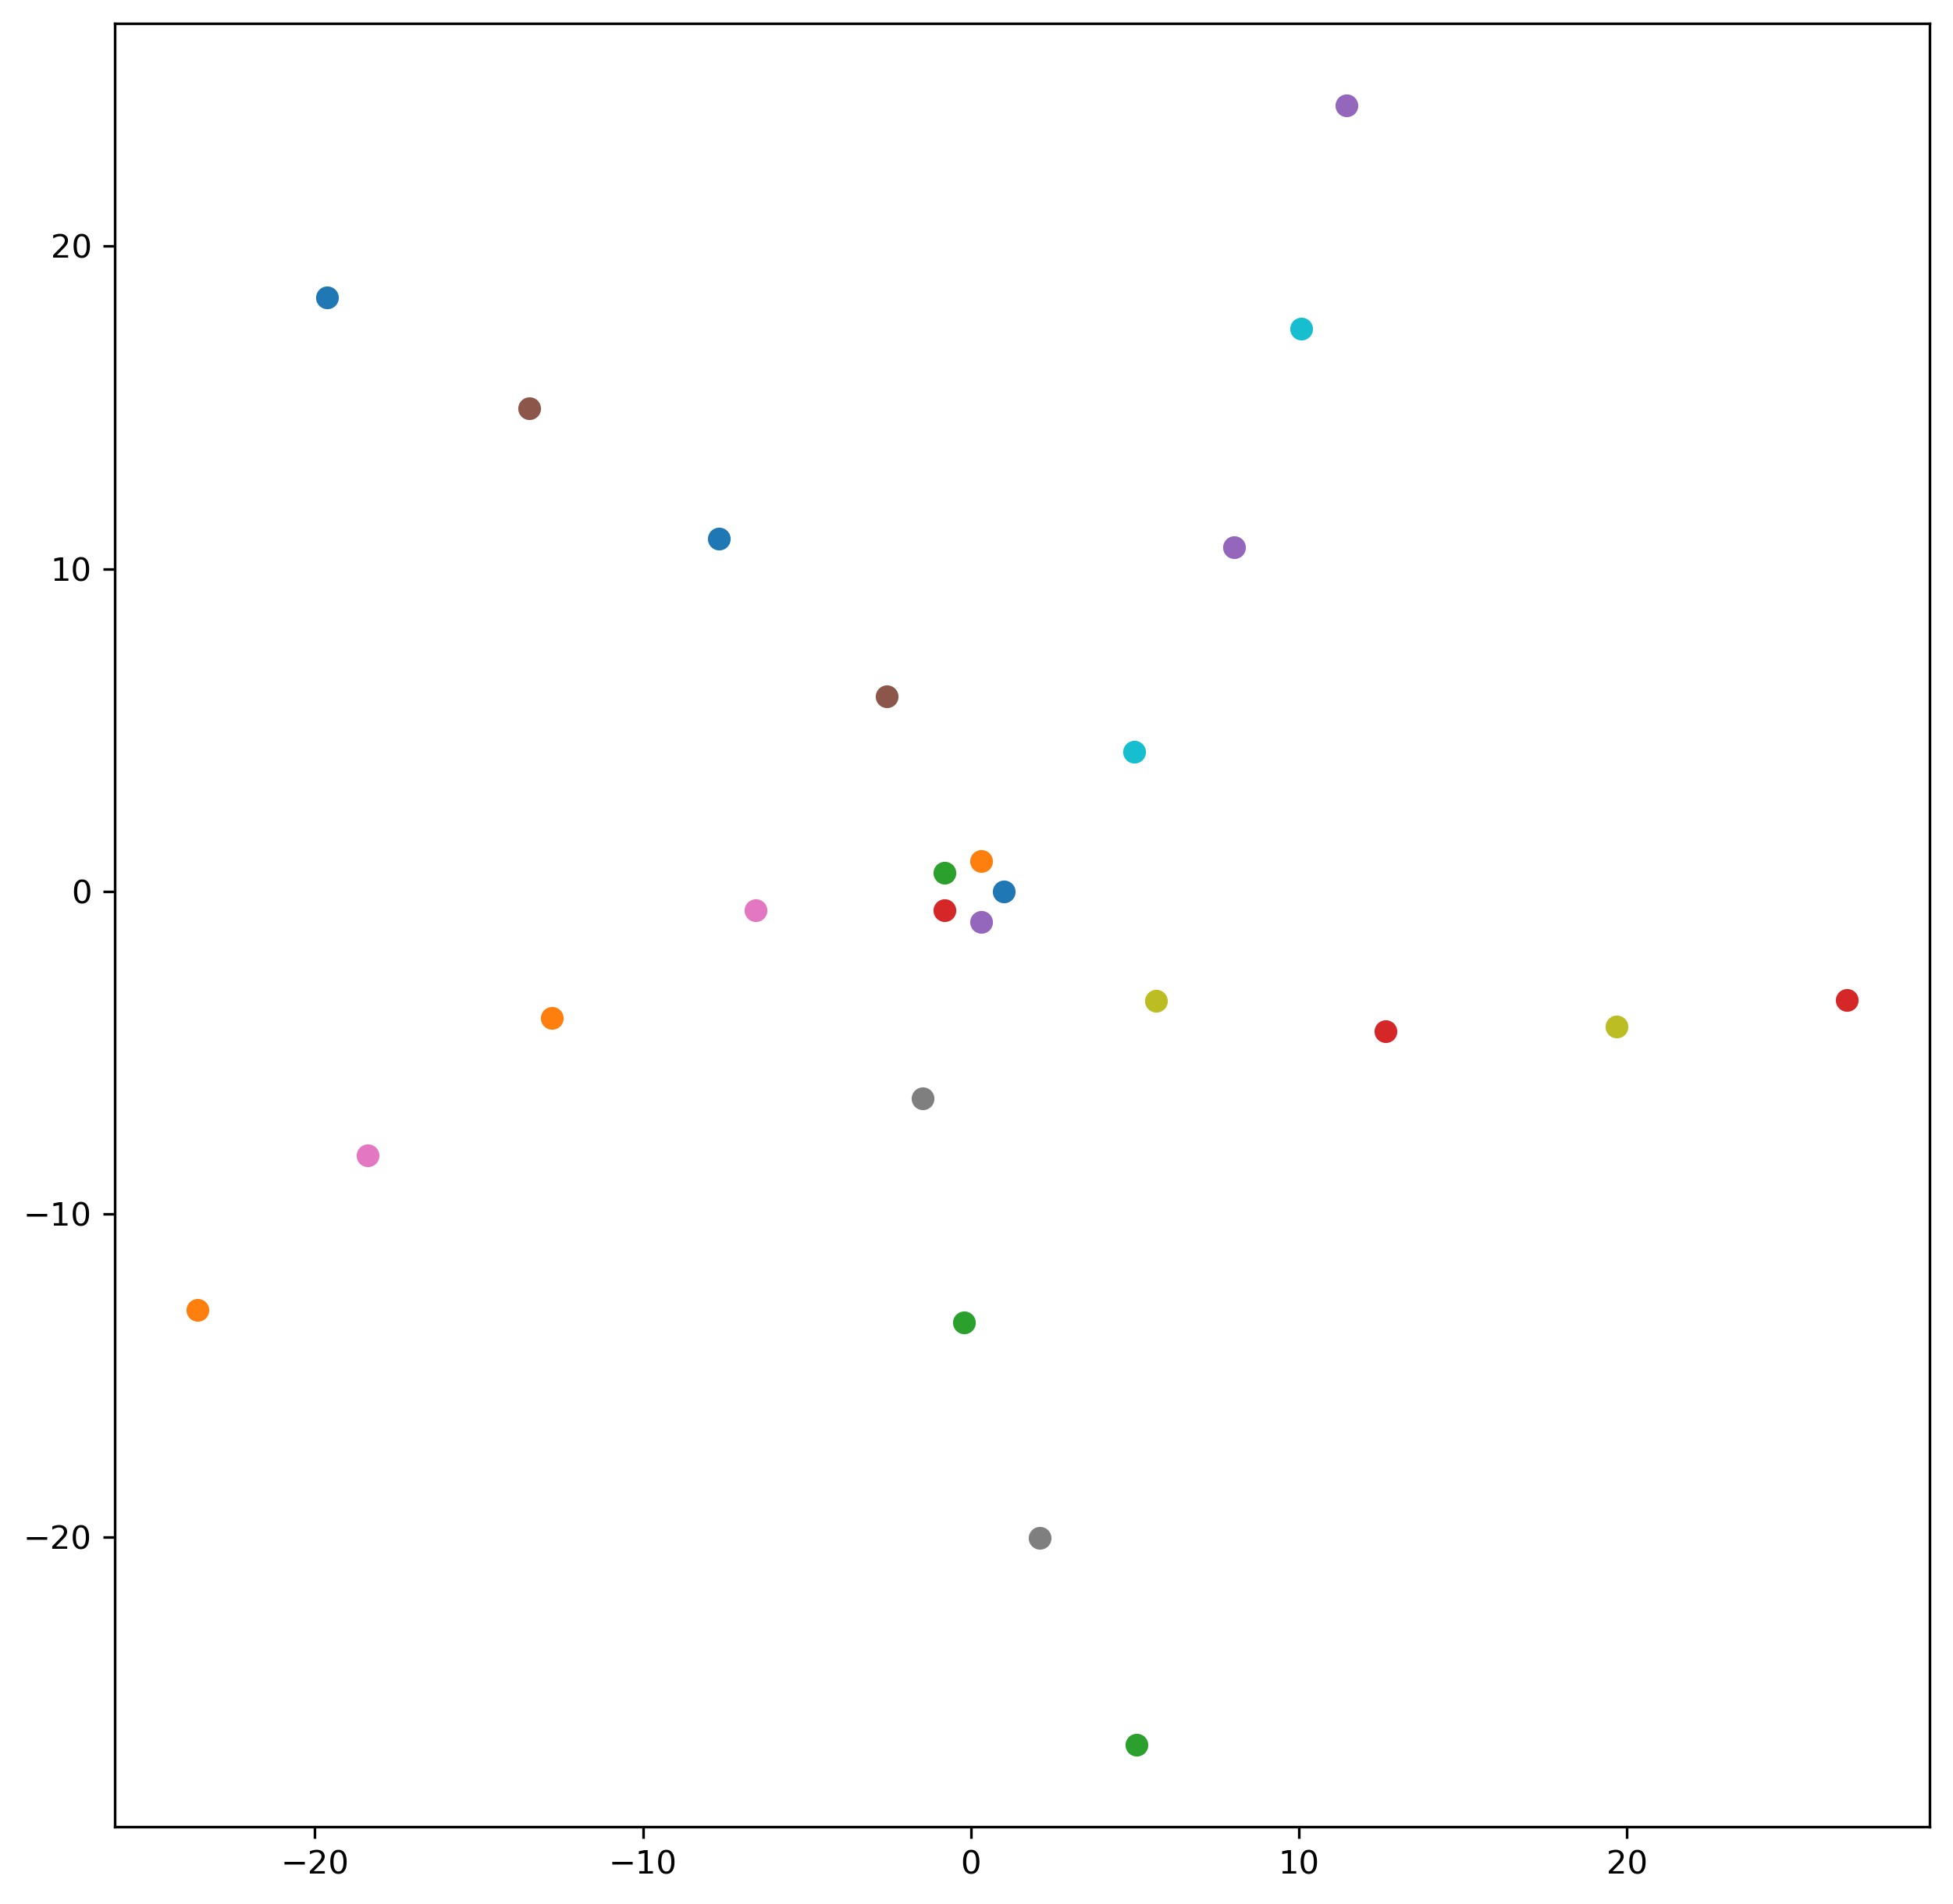

In [8]:
import matplotlib.pyplot as plt
import numpy as np

i_values=range(parametros[3])
j_values=range(parametros[2]) #ver si sumar 1 o no
h=parametros[7]
distancia_entre_r=dk(h,parametros[6],parametros[2])

ultimo_punto=p(parametros[3],parametros[1],parametros[2], parametros[5], parametros[6], parametros[7])

#GRAFICAR TAMBIEN LOS P

x_values_r = np.zeros((len(i_values), len(j_values)))
y_values_r = np.zeros((len(i_values), len(j_values)))

plt.figure(figsize=(10, 10), dpi=300)
centro=np.array([0,0])
radio=e_distance(centro,ultimo_punto)
for i in i_values:
    print("i indice en el for", i)
    for j in j_values:
        print("j indice en el for", j)
        punto_r=r_i_j((i,j,parametros[2],parametros[3],parametros[4],parametros[5],parametros[6],parametros[7]))
        print("punto_r", punto_r)
        x=punto_r[0]
        y=punto_r[1]
        x_values_r[i,j] = x
        y_values_r[i,j] = y
        plt.plot(x_values_r[i,j],y_values_r[i,j], 'o-')
        # if e_distance(centro,punto_r)<=radio:
        #     x_values_r[i,j] = x
        #     y_values_r[i,j] = y
        #     plt.plot(x_values_r[i,j],y_values_r[i,j], 'o-')
# for j in j_values:
#     plt.plot(x_values_p[:,j], y_values_p[:,j], 'o-')

plt.axis('equal')
plt.show()